In [3]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


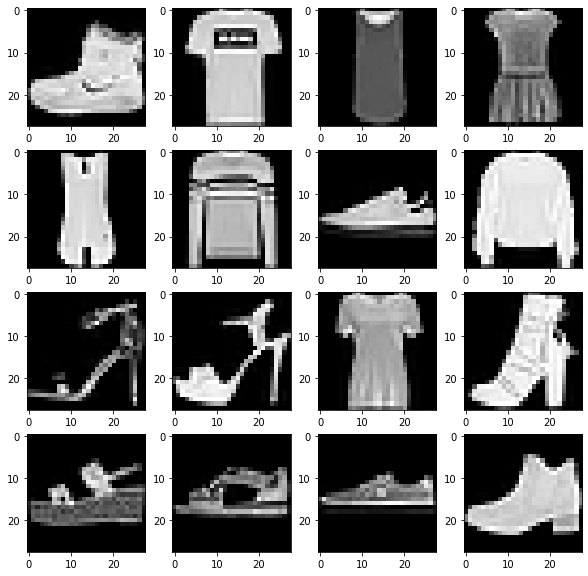

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16): 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()
print(train_Y[:16])

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(units=128, activation='relu'), 
    tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [7]:
!nvidia-smi

Mon Dec  7 05:29:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |    293MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4597 - accuracy: 0.8364 - val_loss: 0.3744 - val_accuracy: 0.8692
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3400 - accuracy: 0.8772 - val_loss: 0.3432 - val_accuracy: 0.8751
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2845 - accuracy: 0.8967 - val_loss: 0.3758 - val_accuracy: 0.8690
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2402 - accuracy: 0.9101 - val_loss: 0.3993 - val_accuracy: 0.8691
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2072 - accuracy: 0.9214 - val_loss: 0.4382 - val_accuracy: 0.8705
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1833 - accuracy: 0.9331 - val_loss: 0.5048 - val_accuracy: 0.8635
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1645 - accuracy: 0.9397 - val_loss: 0.5180 - val_accuracy:

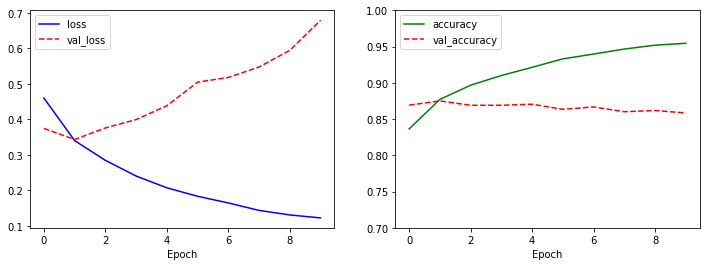

[0.691382646560669, 0.8518000245094299]

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [11]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5287 - accuracy: 0.8084 - val_loss: 0.3585 - val_accuracy: 0.8684
Epoch 2/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3591 - accuracy: 0.8700 - val_loss: 0.3353 - val_accuracy: 0.8747
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3183 - accuracy: 0.8852 - val_loss: 0.3015 - val_accuracy: 0.8845
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.8937 - val_loss: 0.2878 - val_accuracy: 0.8915
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.9021 - val_loss: 0.2960 - val_accuracy: 0.8933
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2518 - accuracy: 0.9085 - val_loss: 0.2974 - val_accuracy: 0.8949
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2349 - accuracy: 0.9138 - val_loss: 0.2842 - val_accuracy:

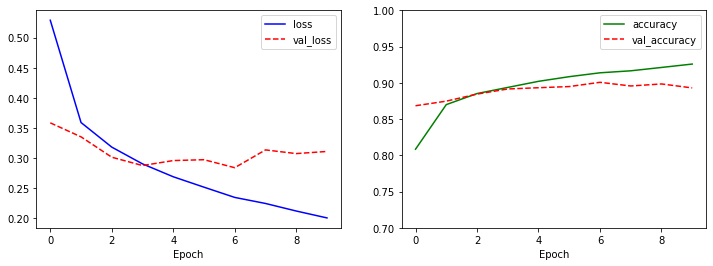

[0.32292795181274414, 0.887499988079071]

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),    
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),  
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')                           
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [14]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5872 - accuracy: 0.7872 - val_loss: 0.3340 - val_accuracy: 0.8731
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3726 - accuracy: 0.8657 - val_loss: 0.2842 - val_accuracy: 0.8965
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3293 - accuracy: 0.8824 - val_loss: 0.2526 - val_accuracy: 0.9067
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3029 - accuracy: 0.8911 - val_loss: 0.2431 - val_accuracy: 0.9099
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2869 - accuracy: 0.8961 - val_loss: 0.2320 - val_accuracy: 0.9131
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2740 - accuracy: 0.9033 - val_loss: 0.2353 - val_accuracy: 0.9155
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2679 - accuracy: 0.9046 - val_loss: 0.2233 - val_ac

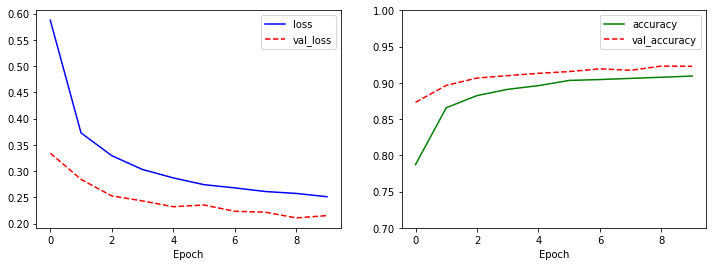

[0.2349332571029663, 0.9158999919891357]

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)